In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Coin toss

In [8]:
np.random.seed(123)

coin = np.random.randint(0,2) # Randomly generate 0 or 1


In [9]:
if coin == 0:
    print("heads")
else:
    print("tails")

heads


In [13]:
# Head or Tails

outcomes = []

for x in range(10) :
    coin = np.random.randint(0,2) # Randomly generate 0 or 1
    if coin == 0 :
        outcomes.append("heads")
    else :
        outcomes.append("tails")
print(outcomes)

['tails', 'tails', 'tails', 'tails', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails']


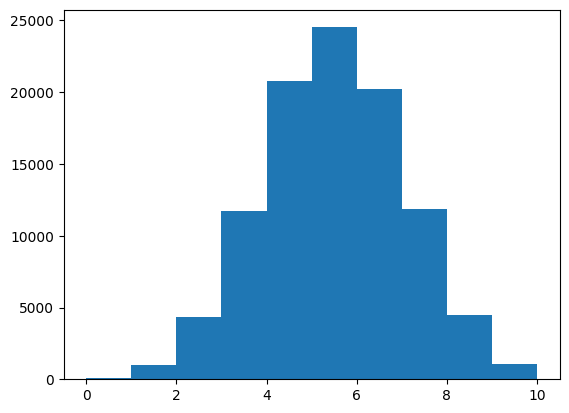

In [35]:
# Head or Tails: Random Walk
np.random.seed(123)
final_tails = []

for x in range(100000):
    tails = [0]

    for x in range(10) :
        coin = np.random.randint(0,2) # Randomly generate 0 or 1
        tails.append(tails[x] + coin)
        
    final_tails.append(tails[-1])

plt.hist(final_tails, bins = 10)
plt.show()

### Results
Un around 25.000 games of 100.000 games played we end up with tails 5 times.


------------


## Calculating the chances to win a bet.
### What are the odds that we'll reach 60 steps high on the Empire State Building?

### The Rules
The objective is to reach step 60.  
We roll the bones. 
- If is 1 or 2, you go one step down
- but if dice is 3, 4 or 5, you go one step up.
- If dice has 6 eyes we roll the dice again and the number of eyes is the number of steps you go up.

### Multiple walks
We have to know if we have a good chance to winning the bet.
To get a ideia on how big is our chances of reaching 60 steps, we can repeatly simulate the random walk and collect the results.


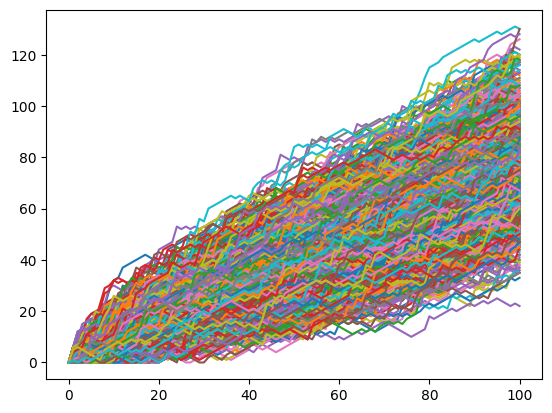

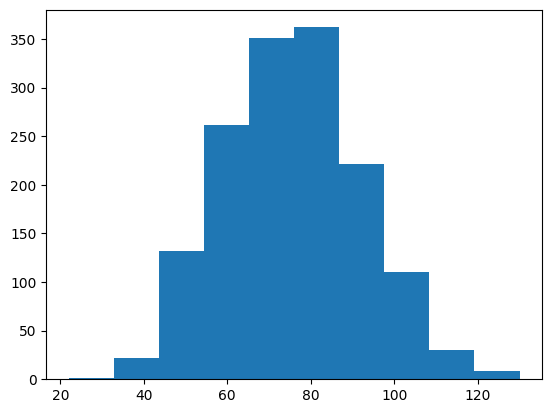

In [59]:
np.random.seed(123)

# Initialize All walks
all_walks = []

# Trys
trys = 1500

# Simulate random walk 10 times
for i in range(trys):

    # Initialize random walk
    random_walk = [0]

    for x in range(100):

        # Setting step with the last element in random_walk
        step = random_walk[-1]

        # Roll the dice
        dice = np.random.randint(1,7)

        # Determine the next step
        if dice <= 2:
            # We have to make sure step can't go below 0
            step = max(0, step - 1)
        elif dice <= 5:
            step = step +1
        else:
            step = step + np.random.randint(1,7)

        # append the next step to random walk
        random_walk.append(step)
    
    # Append
    all_walks.append(random_walk)

# Convert all walks to Numpy array
np_aw = np.array(all_walks)


# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)



# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

# Clear 
plt.clf()

# Select just last row from np_aw_t
ends = np_aw_t[-1]

plt.hist(ends)
plt.show()

In [61]:
sucess = np.sum(ends >= 60)
print(sucess)

odds = sucess / trys
print(odds)

1245
0.83


## Conclusion
We have 83% of chances to reach 60th floor and win the bet
